### Wiener Process

Wiener process is a continuous-time stochastic process (sometimes also refered to as Brownian motion). Wiener process is wildly used in finance, in particular in Black-Scholes option pricing models. Mathematically speaking, the characteristics of the Wiener process are:

- $W_0 = 0$
- $W$ has independent increaments, meaning $ W_{t+u} - W_t $ and $W_s$ are independent for any $t,s <t,$ and $u>=0$
- $W$ has Gaussian(Normal) increments: $ W_{t+u} - W_t ~ N(0,u)$
- $W$ is continuous in t. 

According to famous Black-Sholes models, the option prices cannot be predicted and they follow random walk with constant drift and volatility.

Let's create 5 price paths. Each path is created using differnt type of distributions:

- Normal
- Cauchy
- Exponential 
- Gamma
- Student

<br> 
The aim is to see the differences in distribtions. 

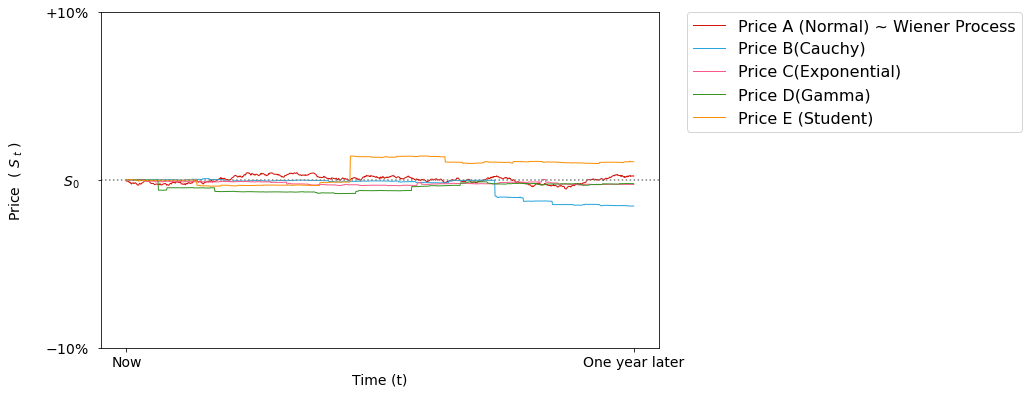

In [109]:
# === Compare two prices over time. ===

# === Importing libraries. Setting plot dimensions. ===
import numpy as np
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10, 6.18))                                           # resizing the figure

# === Parameters for plotting ===
number_of_instances = 1                                                # plot this number of instances for both prices
power = 3                                                               # the random walk is plotted with 10^pow steps on the [0,1] interval
number_of_time_points = int(np.power(10.0,power))                       # number of time points
rescaled_time_points = np.linspace(0, 1, number_of_time_points)         # the list of n time points between 0 and 1
my_fontsize = 16                                                        # font size for the plot
my_linewidth = 1                                                        # setting plot line width

# === Constructing a rescaled Wiener process with n steps (n points) from a std. normal distribution ===
def price_A(n):
    random_steps_A = np.random.standard_normal(n)                       # n random steps, each selected from the given distribution
    cumulated_random_steps_A = np.cumsum(random_steps_A)                # cumulated sum of the random steps
    rescaled_cumulated_random_steps_A = [ x / np.sqrt(n) for x in cumulated_random_steps_A ] # rescaling the cumulated steps
    return rescaled_cumulated_random_steps_A
    
# === Constructing a rescaled process with n steps from a Cauchy distribution  ===
def price_B(n):
    random_steps_B = np.random.standard_cauchy(n)                       # n random steps taken from Cauchy distribution
    cumulated_random_steps_B = np.cumsum(random_steps_B)
    rescaled_cumulated_random_steps_B = [ x / n for x in cumulated_random_steps_B ]
    return rescaled_cumulated_random_steps_B

# === Constructing a rescaled process with n steps from a Exponential distribution  ===
def price_C(n):
    random_steps_B = np.random.standard_exponential(n)                   # n random steps taken from Exponential distribution
    cumulated_random_steps_B = np.cumsum(random_steps_B)
    rescaled_cumulated_random_steps_B = [ x / n for x in cumulated_random_steps_B ]
    return rescaled_cumulated_random_steps_B

# === Constructing a rescaled process with n steps from a Gamma distribution  ===
def price_D(n):
    random_steps_B = np.random.standard_gamma(n)                         # n random steps taken from Gamma distribution
    cumulated_random_steps_B = np.cumsum(random_steps_B)
    rescaled_cumulated_random_steps_B = [ x / n for x in cumulated_random_steps_B ]
    return rescaled_cumulated_random_steps_B

# === Constructing a rescaled process with n steps from a t (student) distribution  ===
def price_E(n):
    random_steps_B = np.random.standard_t(n)                             # n random steps taken from t (student) distribution
    cumulated_random_steps_B = np.cumsum(random_steps_B)
    rescaled_cumulated_random_steps_B = [ x / n for x in cumulated_random_steps_B ]
    return rescaled_cumulated_random_steps_B


# === Plotting ===
for index_of_instance in np.arange(number_of_instances):
    plt.plot(rescaled_time_points, price_A(number_of_time_points), 
             c='#d31409', label="Price A (Normal) ~ Wiener Process", lw=my_linewidth) ##d31409
    plt.plot(rescaled_time_points, price_B(number_of_time_points), 
             c='#27a5dc', label="Price B(Cauchy)", lw=my_linewidth)
    plt.plot(rescaled_time_points, price_B(number_of_time_points), 
             c='#f95989', label="Price C(Exponential)", lw=my_linewidth)
    plt.plot(rescaled_time_points, price_B(number_of_time_points), 
             c='#369422', label="Price D(Gamma)", lw=my_linewidth)
    plt.plot(rescaled_time_points, price_B(number_of_time_points), 
             c='#fd8f02', label="Price E (Student)", lw=my_linewidth)
        
    if ( 0 == index_of_instance ):                                      # with the first instance of both curves, plot the legend
        plt.legend(bbox_to_anchor=(1.05, 1), 
                   loc=2, borderaxespad=0., 
                   fontsize=my_fontsize)                                # legend position, font size

# === Plot properties ===
plot_fontsize = 14
plt.axhline(0, c='gray', ls='dotted')                          
plt.ylabel('Price  ( $S_{\ t}$ )\n', fontsize=plot_fontsize,loc = 'center')                                     
plt.xlabel('Time (t)', fontsize=plot_fontsize,loc = 'center')            

# === Plot ticks ===
ax = plt.gca()                                                         # gca: get current axes, access the properties of the plot
ax.set_xticks([0, 1])
ax.set_xticklabels(['Now','One year later'], fontsize=plot_fontsize)
ax.set_yticks([-10,0,10])
ax.set_yticklabels(["$-10\%$  "," $S_0$    ","$+10\%$  "], fontsize=plot_fontsize)
plt.tick_params(labelsize=plot_fontsize)         
plt.show()                                                     


### European Call Option Payoff and Profit

Option is a contract that gives the owner the right, but not the obligation, to buy (**call option**) or sell (**put option**) the underlying asset with a predetermind price. <br>
Options can be used for hedging purposes. You can buy an option to protect yourself against an unexpectedly high or low future price.

<br> 
Options can be American style or European style. American style options can be exercised at any time up to the expiration date specified in the contract. European style options can be only exercised at the expiration date.  

<br> 

The **Payoff** of European style option would be:


|          | Call Option    | Put Option      |
|:---------|:---------------|:----------------|
| **Long**| $$ Max(S_t-X, 0)$$| $$ Max(X-S_t, 0)$$ |
| **Short**| $$ Min(X-S_t, 0)$$| $$ Max(S_t-X, 0)$$ | 

The **Profit** of European style option would be:


|          | Call Option    | Put Option      |
|:---------|:---------------|:----------------|
| **Long** | $$ Max(S_t-X, 0)- c_0 $$| $$ Max(X-S_t, 0)- c_0$$ |
| **Short**| $$ Min(X-S_t, 0)+ c_0 $$| $$ Max(S_t-X, 0)+ c_0 $$ | 



<br> 
where <br>

- $S_t$ is the price of the underlying asset at the expiration date of the contract
- X   is the strike price or exercise price
- $c_0$ is the call premium.


**Call Options:**

- If the stock price exceeds the exercise price, the option is in-the-money (ITM).
- If the stock price is less than the exercise price, the option is out-of-the-money (OTM).
- If the current market price is equal to the strike price, the option is at-the-money (ATM).

**Put Options:**

- If the stock price is less than the exercise price, the option is in-the-money (ITM).
- If the stock price exceeds the exercise price, the option is out-of-the-money (OTM).
- If the current market price is equal to the strike price, the option is at-the-money (ATM).

In the below generated example, we assume we have a option contract, where the stiike price for the underlying asset is 50 and the option premium is 5. Given this information, we will generate the profit graphs for all option contract.

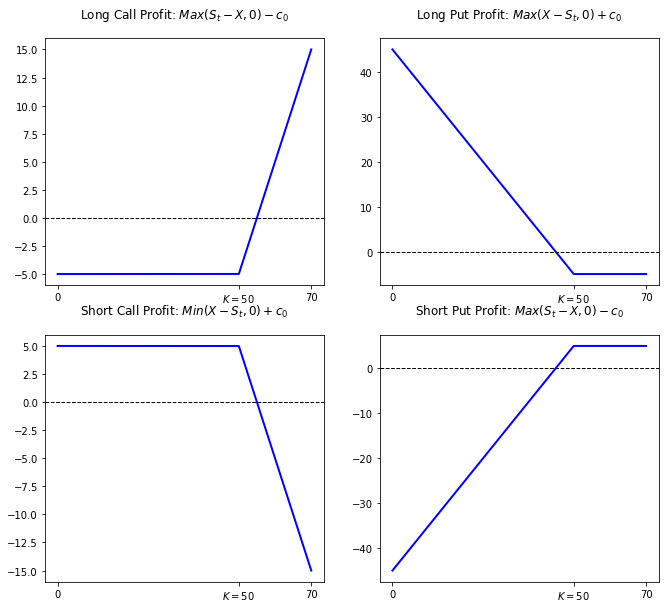

In [100]:
# === Call option payoff ===

# === Importing libraries and Setting values ===
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams                                           # detailed parameter setting
w = 2                                                                     # line width

# === Inputs: Contract Details ===
strike = 50                                                               # strike price of the call option
call_price = 5                                                            # This is only a dummy value for the price of the call option. We will calculate this price.

# === parameters ===
range_min = 0                                                             # starting point of the range where payoff values are plotted
range_max = 70                                                     # end point of the plotting range
step = 0.001                                                              # step size of for plotting
x_axis = np.arange(range_min, range_max, step)                            # the list of underlying stock price values for which the payoff are computed
long_call  = [max(0,x-strike) - call_price for x in x_axis]
short_call = [min(0,strike-x) + call_price for x in x_axis]
long_put  = [max(0,strike - x) - call_price for x in x_axis]
short_put = [min(0,x - strike) + call_price for x in x_axis]

# === Plotting ===
i_ax = [0,1,0,1]
j_ax = [0,0,1,1]
options = [long_call,short_call,long_put,short_put]
titles = ["Long Call Profit: $ Max(S_t-X, 0)- c_0 $",
         "Short Call Profit: $ Min(X-S_t, 0)+ c_0 $",
         "Long Put Profit: $ Max(X-S_t, 0)+ c_0$",
         "Short Put Profit: $ Max(S_t-X, 0)-c_0 $"]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,10))
for i in range(4):
    ax[i_ax[i],j_ax[i]].plot(x_axis, options[i], color='blue', lw=w)
    ax[i_ax[i],j_ax[i]].set_title(titles[i])
    ax[i_ax[i],j_ax[i]].axhline(linestyle='--',color='black',linewidth=1)
    ax[i_ax[i],j_ax[i]].set_xticks([range_min, strike, range_max])
    ax[i_ax[i],j_ax[i]].set_xticklabels([range_min,"$K=$"+str(strike),range_max])
                                                     